# Descripción
Proyecto 1-Parte V (Core)

Análisis y Predicción de Ventas en una Tienda de Retail

# Parte V: Exploración y Visualización de Datos Avanzada

En esta quinta parte del proyecto, vamos a expandir nuestro análisis exploratorio de datos (EDA) y visualización utilizando técnicas avanzadas. Aplicaremos todo lo que hemos aprendido hasta ahora, incluyendo cuadrículas, leyendas, anotaciones, flechas, y subplots, para obtener una comprensión más profunda de nuestro conjunto de datos de ventas.

# 1) Continuar desde la Parte IV
Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/content/retail_sales_dataset_project_1_part_5.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        1000 non-null   int64  
 1   Date                  1000 non-null   object 
 2   Customer ID           1000 non-null   object 
 3   Gender                1000 non-null   object 
 4   Age                   1000 non-null   int64  
 5   Product Category      1000 non-null   object 
 6   Quantity              1000 non-null   int64  
 7   Price per Unit        1000 non-null   int64  
 8   Total Sales           1000 non-null   int64  
 9   n_Total Sales         1000 non-null   float64
 10  Sales Classification  1000 non-null   object 
 11  Month Number          1000 non-null   int64  
 12  Month Name            1000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 101.7+ KB


# 2) Exploración de Datos Avanzada


## a)
Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.


In [25]:
# Verificar valores de las columnas a normalizar o estandarizar
df['Sales Classification'].value_counts()

,count
Sales Classification,
Low,650
Medium,197
High,153


In [26]:
# Normalización o estandarizar manualmente variables cualitativas que me interesen

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

product_category_mapping = {'Clothing': 0, 'Electronics': 1, 'Beauty': 2}
df['Product Category'] = df['Product Category'].replace({'Clothing': 0, 'Electronics': 1, 'Beauty': 2})

sales_classification_mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df['Sales Classification'] = df['Sales Classification'].replace(sales_classification_mapping)

print(df[['Gender', 'Product Category', 'Sales Classification']].head())

   Gender  Product Category  Sales Classification
0       0                 2                     0
1       0                 1                     0
2       0                 0                     1
3       1                 2                     0
4       1                 0                     0


<ipython-input-26-4955e957efeb>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
<ipython-input-26-4955e957efeb>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Product Category'] = df['Product Category'].replace({'Clothing': 0, 'Electronics': 1, 'Beauty': 2})
<ipython-input-26-4955e957efeb>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [27]:
df1 = df[['Gender','Age','Product Category','Quantity','Price per Unit','Total Sales','n_Total Sales','Sales Classification','Month Number']]

correlation_matrix = df1.corr(method='pearson')
print(correlation_matrix)

# Cálculo de la correlación de Spearman
spearman_corr = df1.corr(method='spearman')
print(spearman_corr)

# Cálculo de la correlación de Kendall
kendall_corr = df1.corr(method='kendall')
print(kendall_corr)

                        Gender       Age  Product Category  Quantity  \
Gender                1.000000 -0.002621          0.035662  0.028023   
Age                  -0.002621  1.000000         -0.045932 -0.023737   
Product Category      0.035662 -0.045932          1.000000 -0.013504   
Quantity              0.028023 -0.023737         -0.013504  1.000000   
Price per Unit        0.000961 -0.038423          0.021133  0.017501   
Total Sales           0.001001 -0.060568          0.017644  0.373707   
n_Total Sales         0.001001 -0.060568          0.017644  0.373707   
Sales Classification -0.004105 -0.068865          0.011809  0.313265   
Month Number          0.027250 -0.000640          0.039766 -0.021803   

                      Price per Unit  Total Sales  n_Total Sales  \
Gender                      0.000961     0.001001       0.001001   
Age                        -0.038423    -0.060568      -0.060568   
Product Category            0.021133     0.017644       0.017644   
Quantit

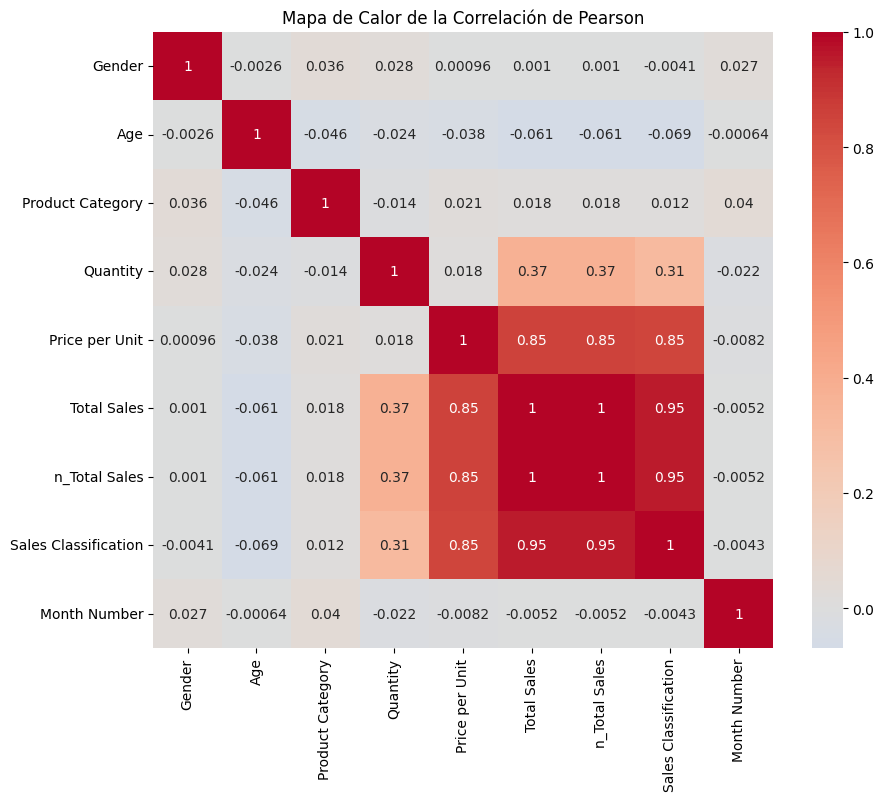

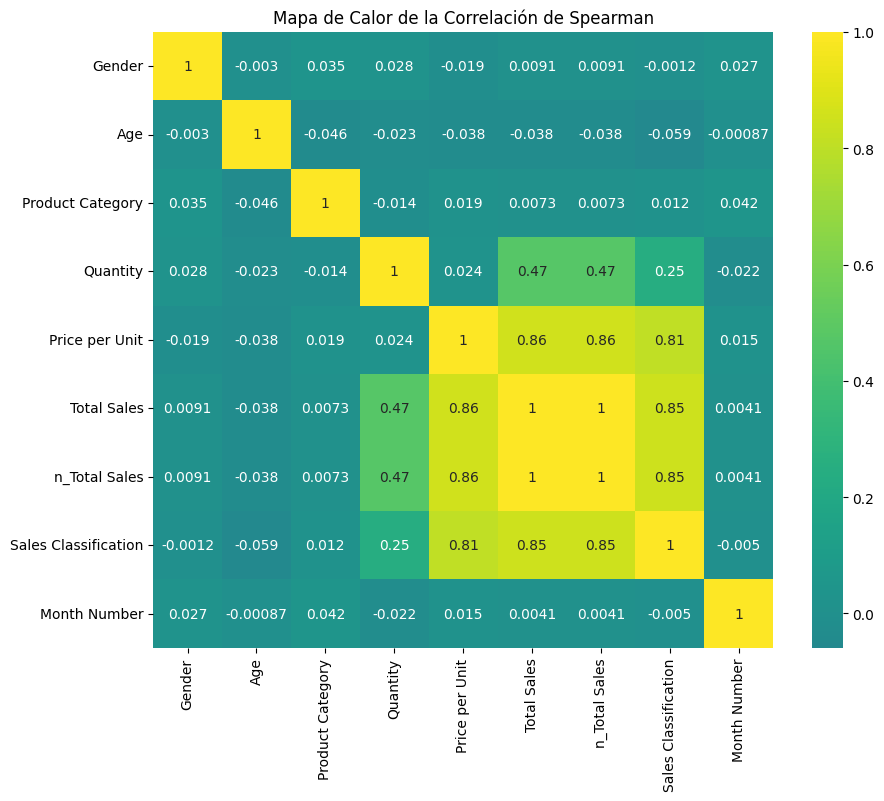

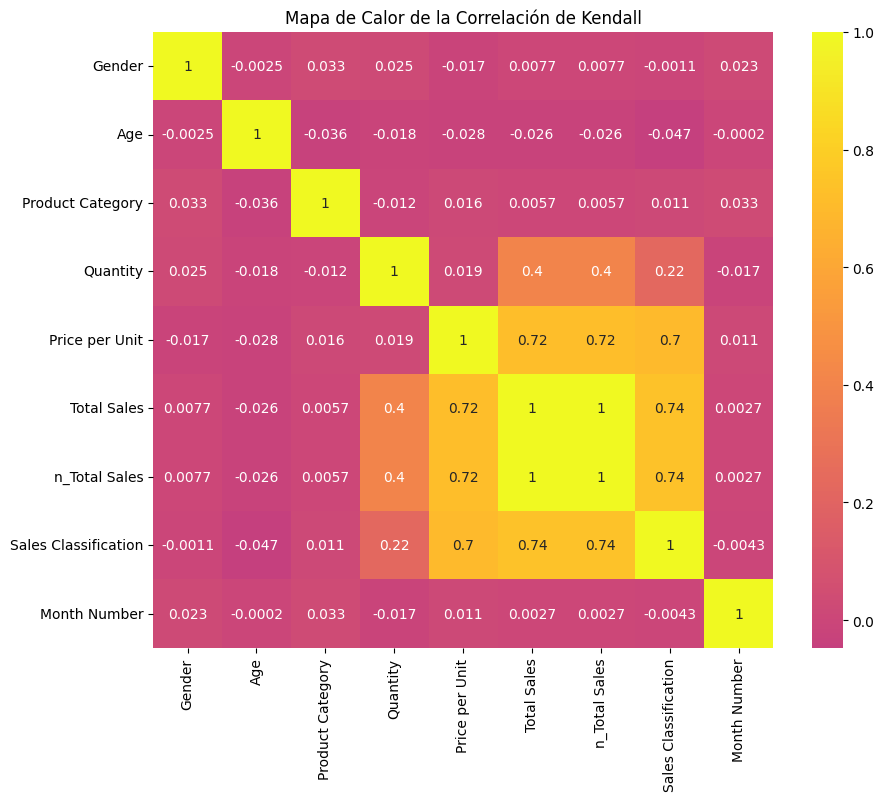

In [28]:
# Crear un mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

# Crear un mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

# Crear un mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

## *Análisis*

Se normalizaron o estandarizaron algunas variables con el fin de tener los análisis de correlación con mas variables, y para ver de manera más clara estas correlaciones se graficaron mapas de calor con estos datos.

Según las tres correlaciones, la variable Price per Unit está correlacionada con las variables Total Sales (también n_Total Sales, pero esta es una normalización de Total Sales), y con Sales Classification, la cual está a su vez correlacionada con Total Sales y n_Total Sales



## b)
Crea subplots para comparar diferentes variables clave.


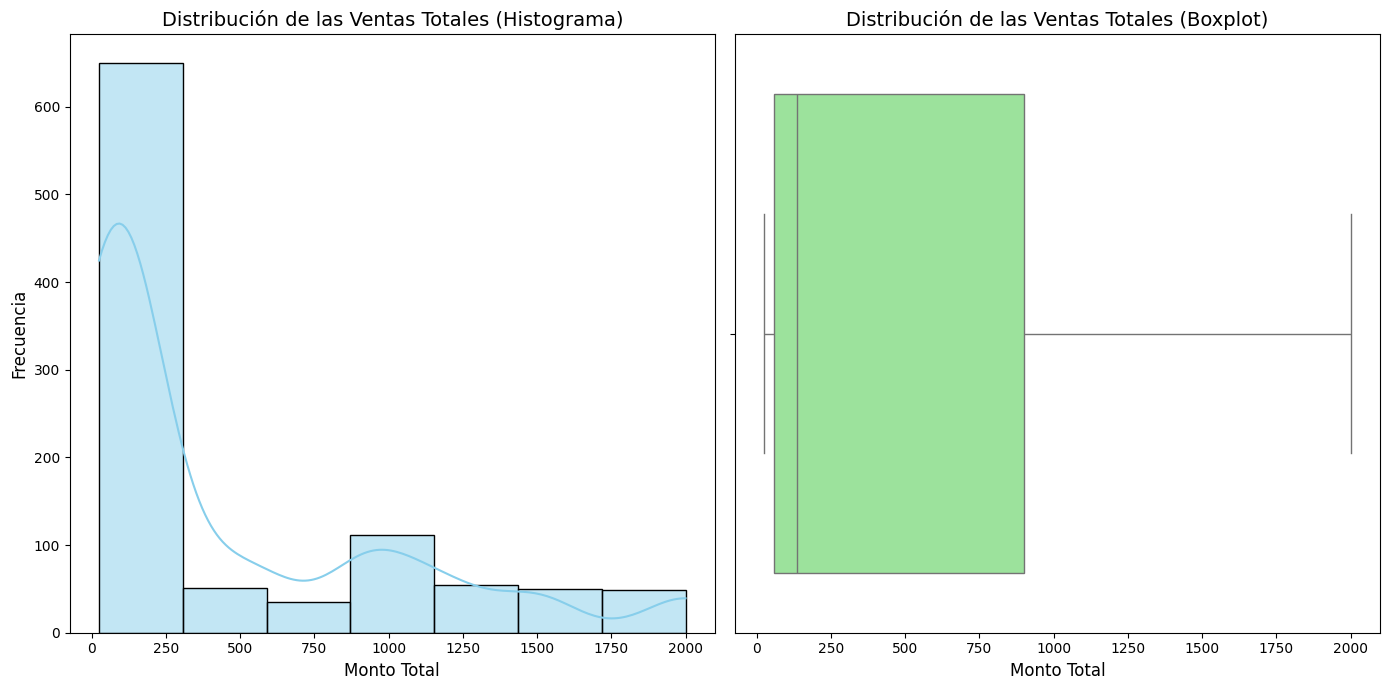

In [48]:
# Configura el tamaño de la figura del gráfico, con dos subgráficos (1 fila y 2 columnas).
plt.figure(figsize=(14, 7))

# Primer subgráfico (histograma) para la distribución de 'Total Sales'.
plt.subplot(1, 2, 1)
sns.histplot(df['Total Sales'], kde=True, bins=7, color='skyblue', edgecolor='black')
plt.title('Distribución de las Ventas Totales (Histograma)', fontsize=14)
plt.xlabel('Monto Total', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Segundo subgráfico (boxplot) para la distribución de 'Total Sales'.
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total Sales'], color='lightgreen')
plt.title('Distribución de las Ventas Totales (Boxplot)', fontsize=14)
plt.xlabel('Monto Total', fontsize=12)
plt.tight_layout()

plt.show()

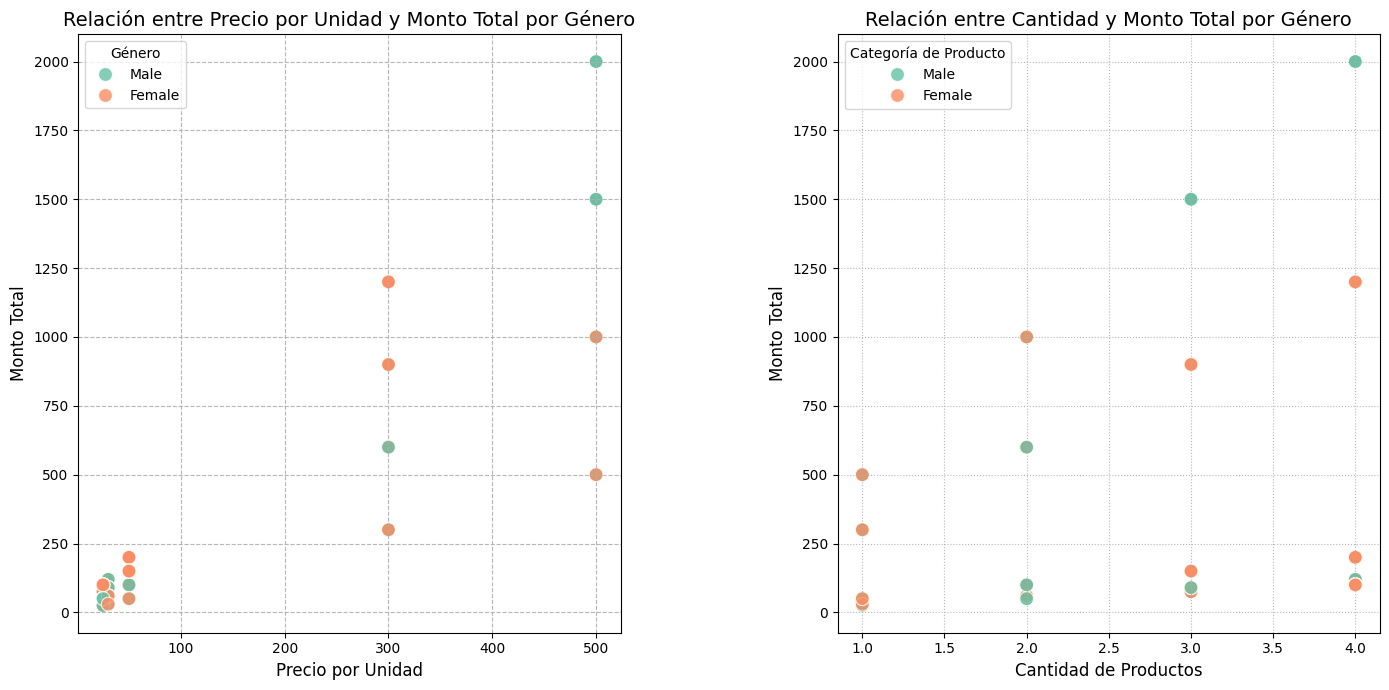

In [57]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales', hue='Gender', palette='Set2', alpha=0.8, s=100)
plt.title('Relación entre Precio por Unidad y Monto Total por Género', fontsize=14)
plt.xlabel('Precio por Unidad', fontsize=12)
plt.ylabel('Monto Total', fontsize=12)
plt.legend(title='Género')
plt.grid(linestyle='--', alpha=0.9)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Quantity', y='Total Sales', hue='Gender', palette='Set2', alpha=0.8, s=100)
plt.title('Relación entre Cantidad y Monto Total por Género', fontsize=14)
plt.xlabel('Cantidad de Productos', fontsize=12)
plt.ylabel('Monto Total', fontsize=12)
plt.legend(title='Categoría de Producto')
plt.grid(linestyle=':', alpha=0.9)

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

<ipython-input-74-e32903653419>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_sum = df.groupby(['Month Name', 'Product Category'])['Total Sales'].sum().unstack().reindex(month_order)
<ipython-input-74-e32903653419>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_mean = df.groupby(['Month Name', 'Product Category'])['Total Sales'].mean().unstack().reindex(month_order)
<ipython-input-74-e32903653419>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

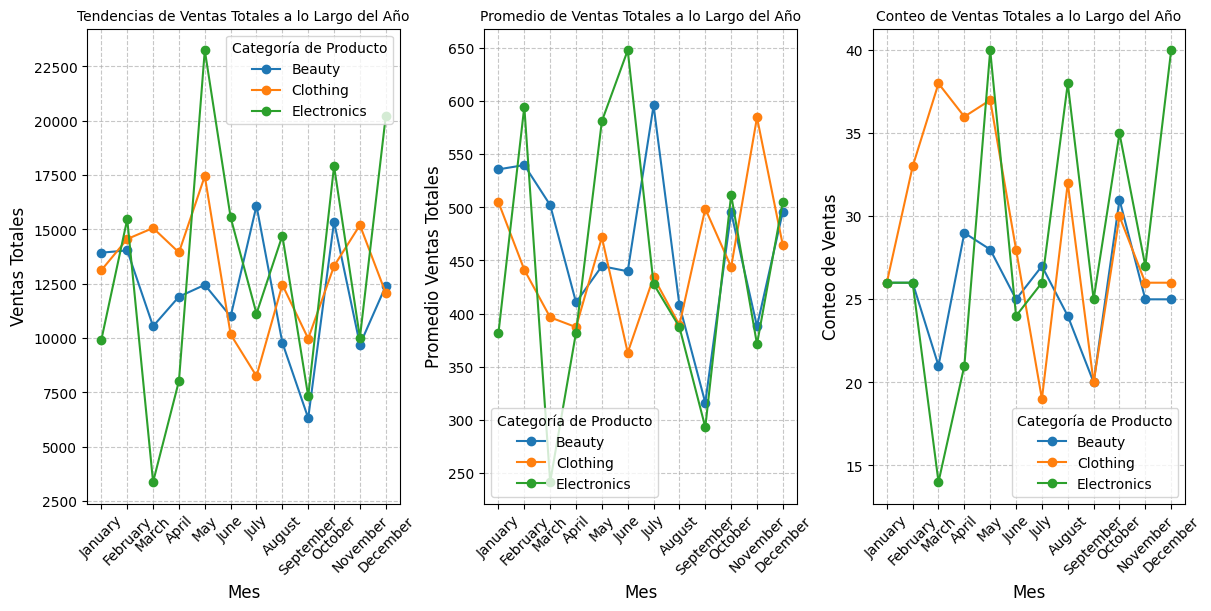

In [74]:
# Asegurarnos de que los meses están ordenados correctamente
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Agrupar y, sumar, promediar o contar ventas totales por mes y por categoría de producto
monthly_sales_sum = df.groupby(['Month Name', 'Product Category'])['Total Sales'].sum().unstack().reindex(month_order)
monthly_sales_mean = df.groupby(['Month Name', 'Product Category'])['Total Sales'].mean().unstack().reindex(month_order)
monthly_sales_count = df.groupby(['Month Name', 'Product Category'])['Total Sales'].count().unstack().reindex(month_order)

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)

# Gráfico de tendencias de ventas totales por Product Category
for category in monthly_sales_sum.columns:
    axes[0].plot(monthly_sales_sum.index, monthly_sales_sum[category], marker='o', label=category)

axes[0].set_title("Tendencias de Ventas Totales a lo Largo del Año", fontsize=10)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Ventas Totales", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title="Categoría de Producto")

# Gráfico de promedios de ventas totales por Product Category
for category in monthly_sales_mean.columns:
    axes[1].plot(monthly_sales_mean.index, monthly_sales_mean[category], marker='o', label=category)

axes[1].set_title("Promedio de Ventas Totales a lo Largo del Año", fontsize=10)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Promedio Ventas Totales", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title="Categoría de Producto")

# Gráfico de conteo de ventas por Product Category
for category in monthly_sales_count.columns:
    axes[2].plot(monthly_sales_count.index, monthly_sales_count[category], marker='o', label=category)

axes[2].set_title("Conteo de Ventas Totales a lo Largo del Año", fontsize=10)
axes[2].set_xlabel("Mes", fontsize=12)
axes[2].set_ylabel("Conteo de Ventas", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend(title="Categoría de Producto")

# Mostrar la figura
plt.show()

## *Análisis*
-	En cuanto a la distribución de ventas, con un histograma y un boxplot, se puede apreciar que la mayor concentración de los datos se encuentran en ventas alrededor de los 200 dólares, y que antes de los 1000 dólares se puede apreciar otro pico en el aumento o número de ventas por estos valores, de resto, por encima de los 1000 son datos que si bien el boxplot los considera dentro del gráfico, si se analizaran algunos rangos, muchos serían datos extremos.

-	Cuando se revisa por género la relación entre precio por unidad y monto total, y la relación entre cantidad y monto total. Pareciera haber una tendencia en la que, a valores más altos de precio por unidad, y de cantidad de productos, los hombres son los que tienen compras por mayores montos. También, que las mujeres tienden a concentrarse en pocos productos con valores montos y precios.

-	La categoría de electrónicos es la que tiene mayores picos de ventas comparados con las otras dos categorías de belleza y ropa, pero es esta última, la que tiene mayor cantidad de ventas entre febrero y mayo. En algunos casos, los picos altos de ventas totales, concuerdan con el promedio de ventas totales y a veces con la cantidad de ventas totales. Como la categoría electrónicos en febrero, ropa en mayo, belleza en julio. A simple vista se pudiera suponer que es la categoría electrónicos los que dan mayores ingresos, si hubieran algunos otros datos se podría saber también que tan rentable es la categoría


## c)
Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

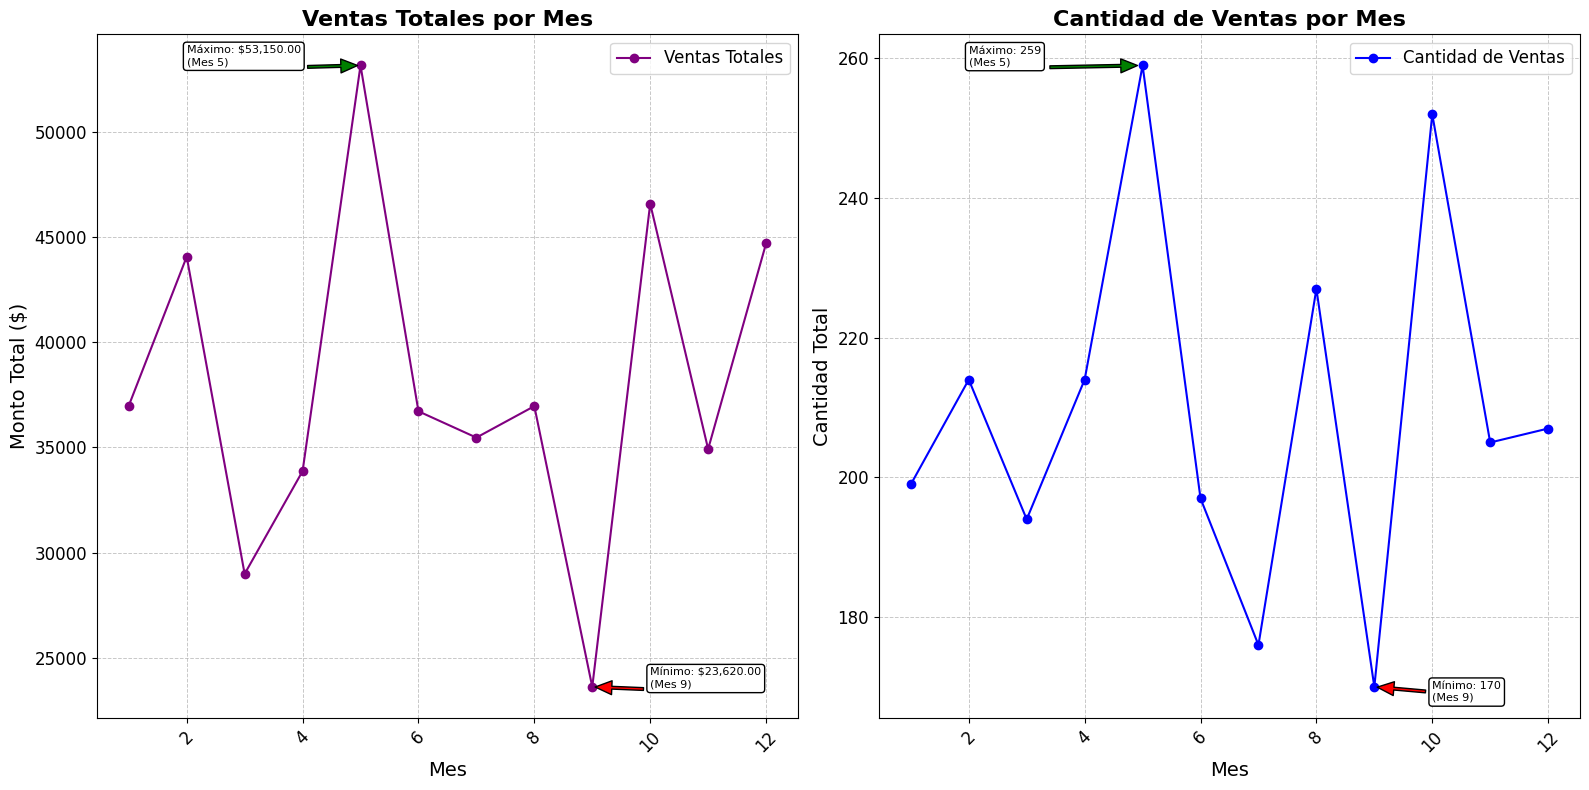

In [88]:
import matplotlib.pyplot as plt

# Agrupa los datos por 'Month Number' y calcula las métricas necesarias.
sales_by_month = df.groupby('Month Number')['Total Sales'].sum()  # Ventas totales
quantity_by_month = df.groupby('Month Number')['Quantity'].sum()  # Cantidad de ventas

# Configura el tamaño de la figura.
plt.figure(figsize=(16, 8))

# Subplot 1: Ventas totales por mes.
plt.subplot(1, 2, 1)
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', linestyle='-', color='purple', label='Ventas Totales')
plt.title('Ventas Totales por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Monto Total ($)', fontsize=14)
plt.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Anotaciones: máximo y mínimo.
max_sales = sales_by_month.max()
min_sales = sales_by_month.min()
max_month = sales_by_month.idxmax()
min_month = sales_by_month.idxmin()

plt.annotate(f'Máximo: ${max_sales:,.2f}\n(Mes {max_month})',
             xy=(max_month, max_sales),
             xytext=(max_month - 3, max_sales + 15),  # Ajusta posición
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.annotate(f'Mínimo: ${min_sales:,.2f}\n(Mes {min_month})',
             xy=(min_month, min_sales),
             xytext=(min_month + 1, min_sales - 20),  # Ajusta posición
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Subplot 2: Cantidad de ventas por mes.
plt.subplot(1, 2, 2)
plt.plot(quantity_by_month.index, quantity_by_month.values, marker='o', linestyle='-', color='blue', label='Cantidad de Ventas')
plt.title('Cantidad de Ventas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad Total', fontsize=14)
plt.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Anotaciones: máximo y mínimo.
max_quantity = quantity_by_month.max()
min_quantity = quantity_by_month.min()
max_month_quantity = quantity_by_month.idxmax()
min_month_quantity = quantity_by_month.idxmin()

plt.annotate(f'Máximo: {max_quantity:,}\n(Mes {max_month_quantity})',
             xy=(max_month_quantity, max_quantity),
             xytext=(max_month_quantity - 3, max_quantity + 0),  # Ajusta posición
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.annotate(f'Mínimo: {min_quantity:,}\n(Mes {min_month_quantity})',
             xy=(min_month_quantity, min_quantity),
             xytext=(min_month_quantity + 1, min_quantity - 2),  # Ajusta posición
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajusta el diseño para evitar superposiciones.
plt.tight_layout()

# Muestra el gráfico.
plt.show()


## *Análisis*
Finalmente, el mes con mayor ventas fue el 5 (mayo), mientras que el que tuvo menor ventas fue el 9 (septiembre)

# 3) Generar un Tag en GitHub y Realizar una Presentación

.

.

a) Generar un Tag en GitHub: Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.

.

.

b) Realizar una Presentación: Prepara una presentación en slides que resuma tu análisis y visualizaciones. La presentación debe incluir:
    
    i) Introducción y objetivos del proyecto.
    
    ii) Descripción del conjunto de datos.

    iii) Principales análisis y hallazgos.

    iv) Visualizaciones clave con explicación.

    v) Conclusiones y recomendaciones.

.

.


**Utiliza herramientas como PowerPoint, Google Slides o cualquier otra aplicación de presentación.**